In [263]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5) 

In [2]:
df =pd.read_csv('../datos_historicos_bcn.csv',parse_dates=['date'],index_col='date')

In [3]:
df1 = df.loc['1983':].copy() # check data from this date only to avoid many Nan

In [4]:
df1.isnull().sum()

precipitaciones      0
horas_sol          172
temp_max             2
temp_min             1
pres_max            16
pres_min           159
racha_max            0
hora_racha         811
vel_media            0
year                 0
month                0
dtype: int64

In [5]:
df1['horas_sol'] = df1['horas_sol'].interpolate()
df1['pres_min'] = df1['pres_min'].interpolate()
df1['pres_max'] = df1['pres_max'].interpolate()

In [6]:
df1['temp_media'] = (df1['temp_max']+df1['temp_min'])/2
df1['pres_media'] = (df1['pres_max']+df1['pres_min'])/2
df1.drop(columns=['hora_racha','racha_max'],inplace=True)
df1['lluvia'] = 0
df1.loc[df.precipitaciones > 0.2, 'lluvia'] = 1

In [7]:
df1.head()

,precipitaciones,horas_sol,temp_max,temp_min,pres_max,pres_min,vel_media,year,month,temp_media,pres_media,lluvia
date,,,,,,,,,,,,
1983-01-01,0.0,7.8,6.8,-1.0,981.3,978.4,0.0,1983,jan,2.9,979.85,0
1983-01-02,0.0,7.2,9.8,0.0,982.3,979.1,0.0,1983,jan,4.9,980.70,0
1983-01-03,0.0,8.1,12.4,6.0,982.5,981.7,0.0,1983,jan,9.2,982.10,0
1983-01-04,0.0,7.7,13.4,3.8,983.3,980.9,0.0,1983,jan,8.6,982.10,0
1983-01-05,0.0,4.2,14.0,4.6,982.5,980.0,0.0,1983,jan,9.3,981.25,0


In [8]:
df1.isnull().sum()

precipitaciones    0
horas_sol          0
temp_max           2
temp_min           1
pres_max           0
pres_min           0
vel_media          0
year               0
month              0
temp_media         2
pres_media         0
lluvia             0
dtype: int64

In [9]:
df1['temp_media'] = df1['temp_media'].interpolate()

In [10]:
df1.isnull().sum()

precipitaciones    0
horas_sol          0
temp_max           2
temp_min           1
pres_max           0
pres_min           0
vel_media          0
year               0
month              0
temp_media         0
pres_media         0
lluvia             0
dtype: int64

In [11]:
df1.dropna(inplace=True)
df1.isnull().sum()

precipitaciones    0
horas_sol          0
temp_max           0
temp_min           0
pres_max           0
pres_min           0
vel_media          0
year               0
month              0
temp_media         0
pres_media         0
lluvia             0
dtype: int64

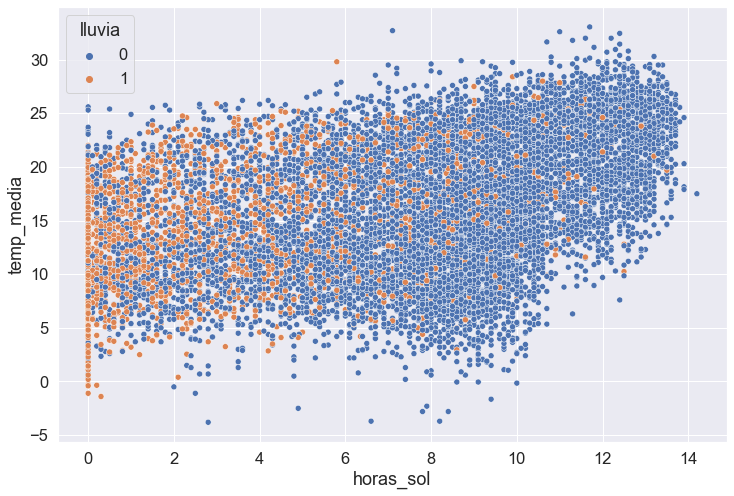

In [12]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=df1,x='horas_sol',y = 'temp_media',hue='lluvia',ax=ax)
plt.show()

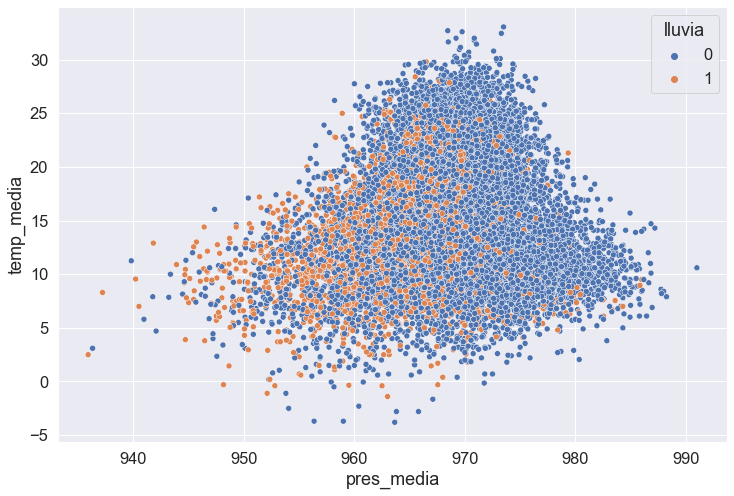

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=df1,x='pres_media',y = 'temp_media',hue='lluvia',ax=ax)
plt.show()

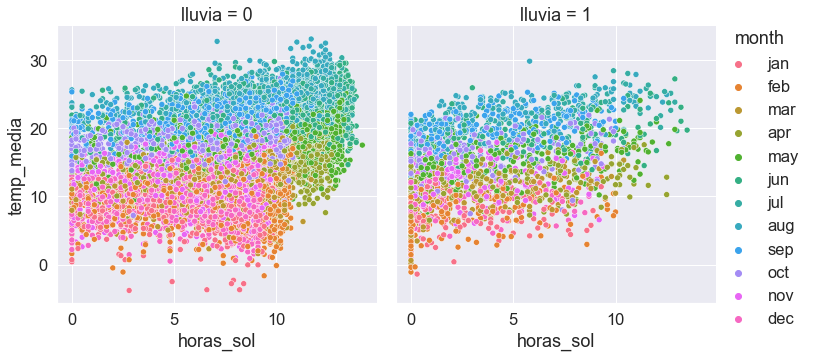

In [14]:
#fig,ax = plt.subplots(figsize=(12,8))
#sns.scatterplot(data=df1,x='pres_media',y = 'temp_media',hue='month',ax=ax,col="lluvia")

sns.relplot(data=df1, x="horas_sol", y="temp_media",col="lluvia", hue="month", kind="scatter")
plt.show()

In [15]:
df1.head()

,precipitaciones,horas_sol,temp_max,temp_min,pres_max,pres_min,vel_media,year,month,temp_media,pres_media,lluvia
date,,,,,,,,,,,,
1983-01-01,0.0,7.8,6.8,-1.0,981.3,978.4,0.0,1983,jan,2.9,979.85,0
1983-01-02,0.0,7.2,9.8,0.0,982.3,979.1,0.0,1983,jan,4.9,980.70,0
1983-01-03,0.0,8.1,12.4,6.0,982.5,981.7,0.0,1983,jan,9.2,982.10,0
1983-01-04,0.0,7.7,13.4,3.8,983.3,980.9,0.0,1983,jan,8.6,982.10,0
1983-01-05,0.0,4.2,14.0,4.6,982.5,980.0,0.0,1983,jan,9.3,981.25,0


### Aprendizaje Supervisado

In [16]:
X = df1.drop(columns=['precipitaciones','year','lluvia','month'])
#X['month'] = df1.index.month
X.head()

,horas_sol,temp_max,temp_min,pres_max,pres_min,vel_media,temp_media,pres_media
date,,,,,,,,
1983-01-01,7.8,6.8,-1.0,981.3,978.4,0.0,2.9,979.85
1983-01-02,7.2,9.8,0.0,982.3,979.1,0.0,4.9,980.70
1983-01-03,8.1,12.4,6.0,982.5,981.7,0.0,9.2,982.10
1983-01-04,7.7,13.4,3.8,983.3,980.9,0.0,8.6,982.10
1983-01-05,4.2,14.0,4.6,982.5,980.0,0.0,9.3,981.25


In [17]:
y= df1[['lluvia']]

0    10851
1     2627
Name: lluvia, dtype: int64


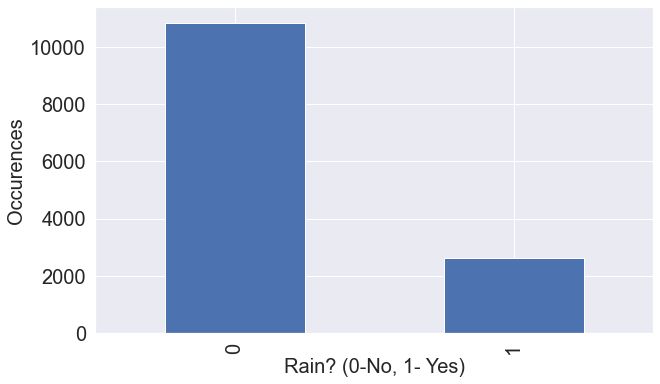

In [18]:
y['lluvia'].value_counts().plot.bar(figsize=(10,6),fontsize=20)
# vemos que en la muestra hay imbalance
y['lluvia'].value_counts(normalize=True)
# 80% of data shows no rain
# 20% of data shows rain
print(y['lluvia'].value_counts())
plt.xlabel('Rain? (0-No, 1- Yes)',fontsize=20)
plt.ylabel('Occurences',fontsize=20)
plt.show()

In [19]:
from sklearn.tree import DecisionTreeClassifier 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix

In [23]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [24]:
params_dt = {'max_depth':[2,3,5,6,8],
         'min_samples_leaf':[0.01,0.02,0.04],
         'max_features':[0.2,0.4,0.8,0.9]
         }
params_knn = {'n_neighbors':[20,40,60,80] }

In [25]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()


In [26]:
#print(KNN.get_params())

In [27]:
grid_dt = GridSearchCV(estimator=dt,param_grid=params_dt,scoring='accuracy',cv=10)

In [28]:
grid_knn = GridSearchCV(estimator=knn,param_grid=params_knn,scoring='accuracy',cv=10)

In [29]:
grid_dt.fit(X_train,y_train)
grid_knn.fit(X_train,y_train)

/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [20, 40, 60, 80]}, scoring='accuracy')

In [30]:
print(grid_dt.best_params_,grid_dt.best_score_)
best_model_dt = grid_dt.best_estimator_
best_model_knn = grid_knn.best_estimator_
print(grid_knn.best_params_,grid_knn.best_score_)

{'max_depth': 8, 'max_features': 0.8, 'min_samples_leaf': 0.02} 0.8509663083918975
{'n_neighbors': 40} 0.8452406896489746


In [31]:
print(f'best set acuracy is {round(best_model_dt.score(X_test,y_test),2)}')
y_pred_dt = grid_dt.predict(X_test)
y_pred_knn = grid_knn.predict(X_test)
print(f'best set acuracy is {round(best_model_knn.score(X_test,y_test),2)}')

best set acuracy is 0.84
best set acuracy is 0.84


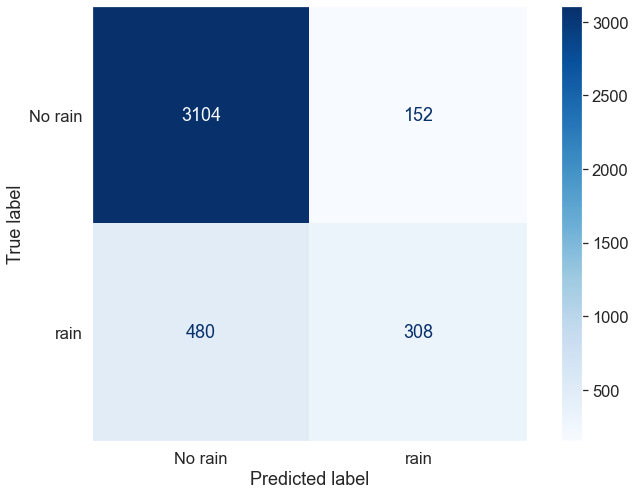

In [32]:
fig,ax = plt.subplots(figsize=(12,8))
plot_confusion_matrix(grid_dt, X_test, y_test,
                      display_labels=['No rain','rain'],
                      cmap=plt.cm.Blues,normalize=None,ax=ax)
plt.grid(None)
plt.show()

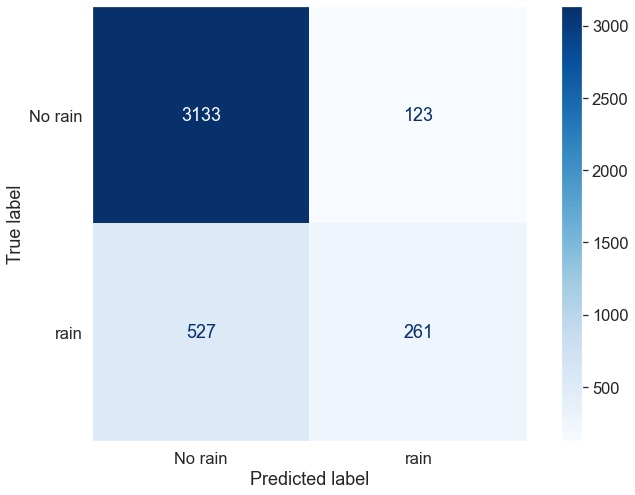

In [33]:
fig,ax = plt.subplots(figsize=(12,8))
plot_confusion_matrix(grid_knn, X_test, y_test,
                      display_labels=['No rain','rain'],
                      cmap=plt.cm.Blues,normalize=None,ax=ax)
plt.grid(None)
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
X.head()

,horas_sol,temp_max,temp_min,pres_max,pres_min,vel_media,temp_media,pres_media
date,,,,,,,,
1983-01-01,7.8,6.8,-1.0,981.3,978.4,0.0,2.9,979.85
1983-01-02,7.2,9.8,0.0,982.3,979.1,0.0,4.9,980.70
1983-01-03,8.1,12.4,6.0,982.5,981.7,0.0,9.2,982.10
1983-01-04,7.7,13.4,3.8,983.3,980.9,0.0,8.6,982.10
1983-01-05,4.2,14.0,4.6,982.5,980.0,0.0,9.3,981.25


In [36]:
ss = StandardScaler()
X_new = ss.fit_transform(X)

In [37]:
X_new

array([[ 0.18882004, -1.85309928, -2.2321549 , ..., -2.13783005,
        -2.05540436,  1.82457388],
       [ 0.03316527, -1.41334615, -2.05914292, ..., -2.13783005,
        -1.73353828,  1.95908095],
       [ 0.26664742, -1.03222677, -1.02107105, ..., -2.13783005,
        -1.04152621,  2.180622  ],
       ...,
       [ 0.05910774, -1.20812802, -1.33249261, ..., -1.39877833,
        -1.28292577, -2.51921319],
       [-0.04466211, -1.4719799 , -1.66121537, ...,  1.39906033,
        -1.58065189, -1.39568357],
       [ 0.18882004, -1.19346959, -1.52280579, ..., -0.39577956,
        -1.36339229, -1.15831815]])

In [38]:
X_train,X_test, y_train,y_test = train_test_split(X_new,y,test_size=0.3,stratify=y)

In [39]:
grid_dt.fit(X_train,y_train)
best_model = grid_dt.best_estimator_
print(f'best set acuracy is {round(best_model.score(X_test,y_test),2)}')
y_pred = grid_dt.predict(X_test)

best set acuracy is 0.85


In [40]:
cm = confusion_matrix(y_true=y_test,y_pred= y_pred)
print(cm)

[[3100  156]
 [ 432  356]]


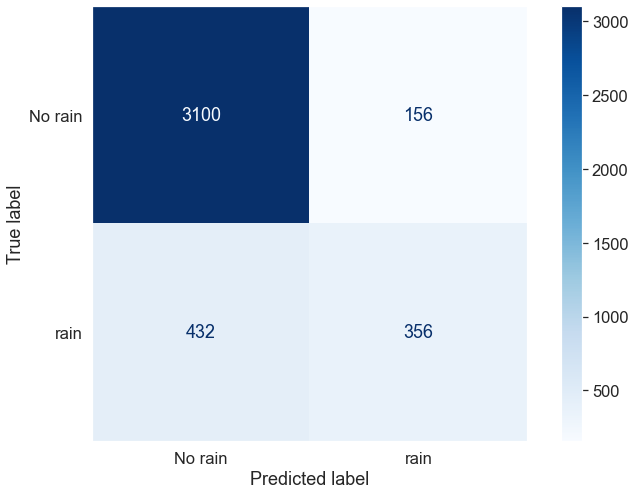

In [41]:
fig,ax = plt.subplots(figsize=(12,8))
plot_confusion_matrix(grid_dt, X_test, y_test,
                      display_labels=['No rain','rain'],
                      cmap=plt.cm.Blues,normalize=None,ax=ax)
plt.grid(None)
plt.show()

In [43]:
grid_knn.fit(X_train,y_train)
best_model = grid_knn.best_estimator_
print(f'best set acuracy is {round(best_model.score(X_test,y_test),2)}')
y_pred = grid_knn.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred= y_pred)
print(cm)


/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

best set acuracy is 0.85
[[3107  149]
 [ 452  336]]


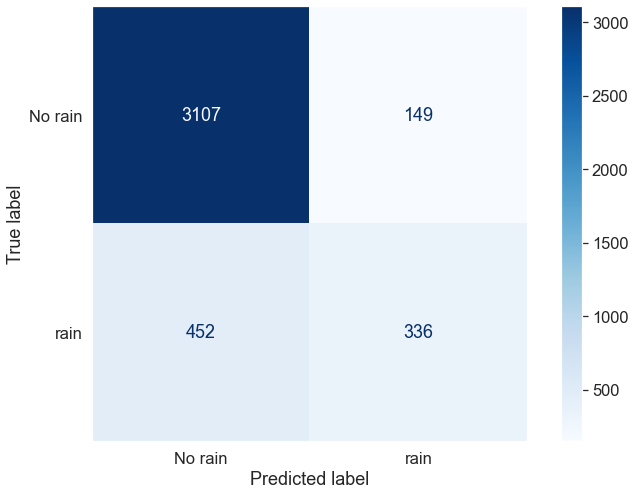

In [44]:
fig,ax = plt.subplots(figsize=(12,8))
plot_confusion_matrix(grid_knn, X_test, y_test,
                      display_labels=['No rain','rain'],
                      cmap=plt.cm.Blues,normalize=None,ax=ax)
plt.grid(None)
plt.show()

### Aprendizaje No Supervisado

In [255]:
X_new = df1.drop(columns=['precipitaciones','lluvia','year','month'])
#X_new['month'] = X_new.index.month
#nos quedamos con estas variables para ver distintos tipos de cluster

In [256]:
X_new

,horas_sol,temp_max,temp_min,pres_max,pres_min,vel_media,temp_media,pres_media
date,,,,,,,,
1983-01-01,7.8,6.8,-1.0,981.3,978.4,0.00,2.90,979.85
1983-01-02,7.2,9.8,0.0,982.3,979.1,0.00,4.90,980.70
1983-01-03,8.1,12.4,6.0,982.5,981.7,0.00,9.20,982.10
1983-01-04,7.7,13.4,3.8,983.3,980.9,0.00,8.60,982.10
1983-01-05,4.2,14.0,4.6,982.5,980.0,0.00,9.30,981.25
...,...,...,...,...,...,...,...,...
2020-12-27,2.5,7.3,0.6,969.3,945.7,25.92,3.95,957.50
2020-12-28,8.2,10.1,4.7,949.6,941.7,9.00,7.40,945.65
2020-12-29,7.3,11.2,4.2,955.2,949.6,5.04,7.70,952.40


In [213]:
 from sklearn.cluster import KMeans

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_new)

In [216]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300}

In [199]:
#Try up to 20 clusters
n_clusters =np.arange(1,21)
inercias = []
for cluster in n_clusters:
    knn = KMeans(n_clusters=cluster,**kmeans_kwargs)    
    knn.fit(scaled_features)
    err = knn.inertia_
    print(cluster,err)
    inercias.append(err)

1 107824.00000000025
2 75382.37635333212
3 53055.8731155292
4 47207.29683052325
5 42714.94384108106
6 39663.58046278138
7 36991.96345826601
8 34580.3665868269
9 32840.16365057455
10 31372.220662880274
11 29915.49500016361
12 28631.693840882366
13 27562.22515377824
14 26655.95939946014
15 25876.741146959383
16 25124.294574275995
17 24379.85356714171
18 23767.773112257608
19 23265.968627942722
20 22697.176372912614


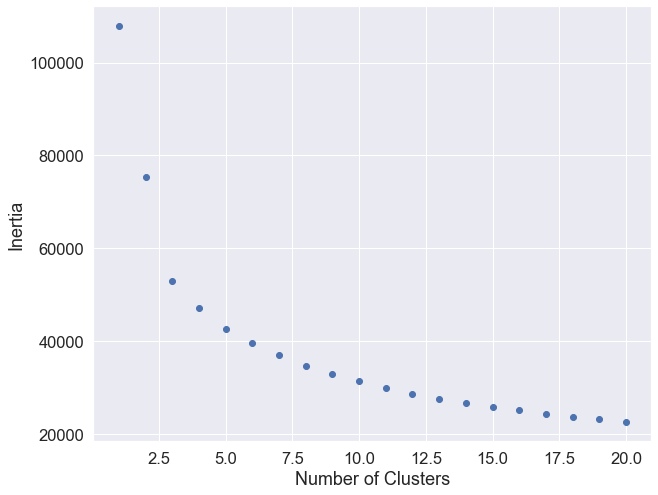

In [201]:
# Elbow plot #
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(n_clusters,inercias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia") # Minimizar sum of the Square Error (SSE)
plt.show()

In [150]:
from sklearn.metrics import silhouette_score

In [203]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(scaled_features, kmeans.labels_)    
    silhouette_coefficients.append(score)
    print("For n_clusters =", k,"The average silhouette_score is :", score)


For n_clusters = 2 The average silhouette_score is : 0.28397081364155174
For n_clusters = 3 The average silhouette_score is : 0.31596160307180576
For n_clusters = 4 The average silhouette_score is : 0.2682172840869982
For n_clusters = 5 The average silhouette_score is : 0.22237398458721475
For n_clusters = 6 The average silhouette_score is : 0.19575854678297555
For n_clusters = 7 The average silhouette_score is : 0.20044469972074638
For n_clusters = 8 The average silhouette_score is : 0.19004575823255163
For n_clusters = 9 The average silhouette_score is : 0.17429464078591206
For n_clusters = 10 The average silhouette_score is : 0.16978974120113893


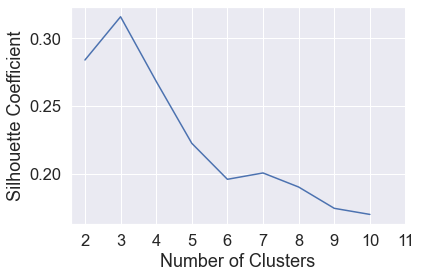

In [204]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# fit the data to n_clusters = 3

In [235]:
knn = KMeans(n_clusters=3)
data = knn.fit(scaled_features)
print(data.labels_)
len(data.labels_)

[2 2 2 ... 1 1 1]


13478

In [277]:
# nueva columna con las etiquetas
df1['cluster'] = data.labels_

In [278]:
df1.head()

,precipitaciones,horas_sol,temp_max,temp_min,pres_max,pres_min,vel_media,year,month,temp_media,pres_media,lluvia,labels,cluster
date,,,,,,,,,,,,,,
1983-01-01,0.0,7.8,6.8,-1.0,981.3,978.4,0.0,1983,jan,2.9,979.85,0,2,2
1983-01-02,0.0,7.2,9.8,0.0,982.3,979.1,0.0,1983,jan,4.9,980.70,0,2,2
1983-01-03,0.0,8.1,12.4,6.0,982.5,981.7,0.0,1983,jan,9.2,982.10,0,2,2
1983-01-04,0.0,7.7,13.4,3.8,983.3,980.9,0.0,1983,jan,8.6,982.10,0,2,2
1983-01-05,0.0,4.2,14.0,4.6,982.5,980.0,0.0,1983,jan,9.3,981.25,0,2,2


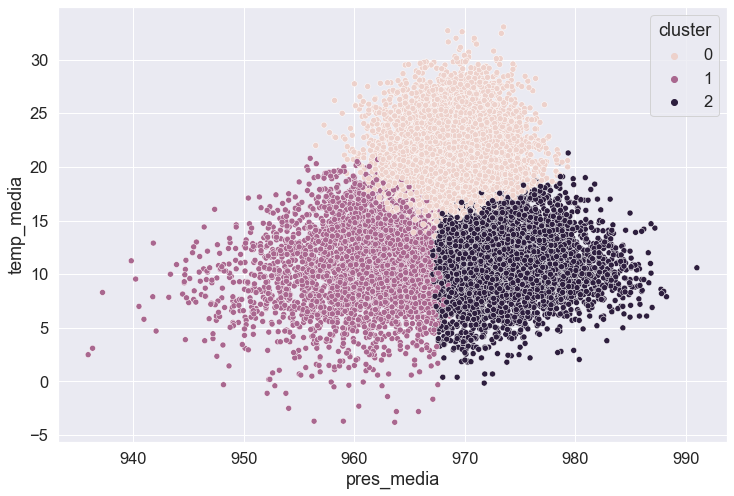

In [279]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=df1,x='pres_media',y = 'temp_media',hue='cluster',ax=ax)
plt.show()

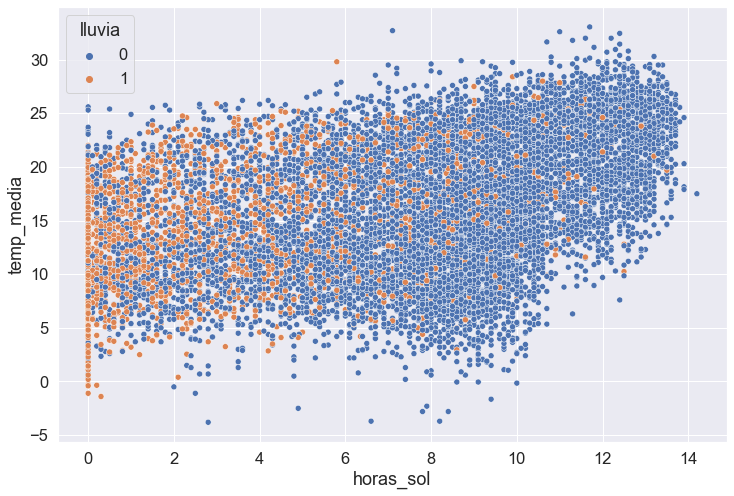

In [67]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=df1,x='horas_sol',y = 'temp_media',hue='lluvia',ax=ax)
plt.show()

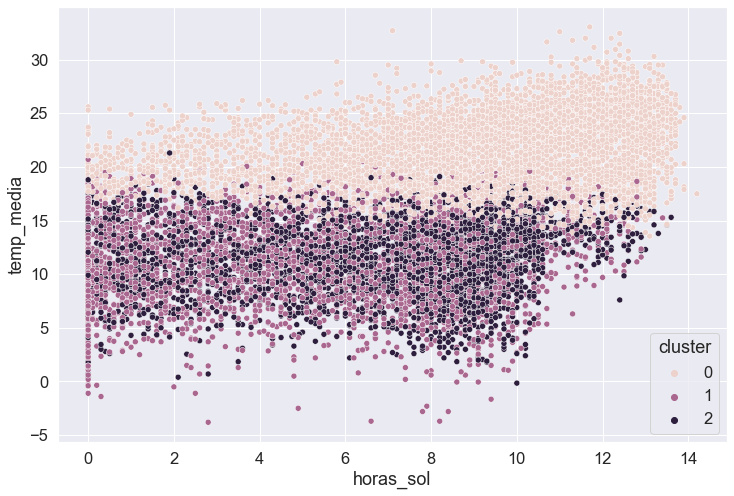

In [61]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=df1,x='horas_sol',y = 'temp_media',hue='cluster',ax=ax)
plt.show()

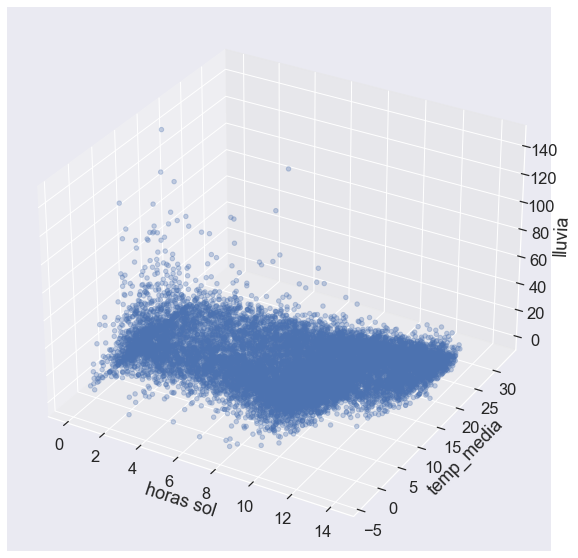

In [65]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=df1["horas_sol"],ys=df1["temp_media"], zs=df1["precipitaciones"],alpha=0.3)
ax.set_xlabel('horas sol')
ax.set_ylabel('temp_media')
ax.set_zlabel('lluvia')
plt.show()